<a href="https://colab.research.google.com/github/AmaraCodes/Blockchain_Based_Voting_system/blob/master/deep_learning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import torch

# graphs
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()

# Load the data

In [ ]:
# read the data
train = pd.read_csv("train.csv", low_memory= False)
store = pd.read_csv("store.csv", low_memory= False)
test = pd.read_csv('test.csv', low_memory= False)


# Exploring the train table

In [ ]:
# read the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
# number of records and columns
print(f'Records/rows = {train.shape[0]} \nVariables/coumns = {train.shape[1]}')

Records/rows = 1017209 
Variables/coumns = 9


In [ ]:
# visualizing the data
train.head(15)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [ ]:
# showing the range of the training data
print(f'Data from = {train["Date"].min()}\ntill = {train["Date"].max()}')

Data from = 2013-01-01
till = 2015-07-31


In [ ]:
# how many nulls per feature in the train table
train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

# Exploring the store table

In [ ]:
#showing information of the store table
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
# visualizing store table
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
# printing number of records and features
print(f'Records/rows = {store.shape[0]} \nVariables/coumns = {store.shape[1]}')

Records/rows = 1115 
Variables/coumns = 10


In [ ]:
#read the data about the stores
store = pd.read_csv("store.csv")

In [ ]:
# displaying the table
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
# how many  nulls per feature
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
# counting number of dulicated rows
store.duplicated().sum()

0

# Exploring the Test table

In [ ]:
# visualizing the Test table
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [ ]:
# getting info about the table
test. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [ ]:
# counting the number of nulls per feature
test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [ ]:
test[test['Open'].isna()]
# all null data is from the store 622

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0
9039,9040,622,1,2015-09-07,NaN,0,0,0


It can be seen that all missing values values of the open variable in the test table were from the Store 622, however how it is shown on [this website](https://www.kaggle.com/competitions/rossmann-store-sales/discussion/16835) all of them should be 1 (open). However we will imput 0 on the days that are sundays (if it is the case) due to the fact that usually the shops on those days are closed.

In [ ]:
test['Open'][test['Open'].isna()] = 1
# all null data is from the store 622

<ipython-input-26-fde4bc4e0461>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Open'][test['Open'].isna()] = 1


In [ ]:
# check that we imputed the nulls correctly
test.isnull().sum()

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
# showing the range of the test data to know the prediction time
print(f'Data from = {test["Date"].min()}\ntill = {test["Date"].max()}')

Data from = 2015-08-01
till = 2015-09-17


In [ ]:
#  convert the date column to a date time type
test['Date'] = pd.to_datetime(test['Date'], format= '%Y-%m-%d')

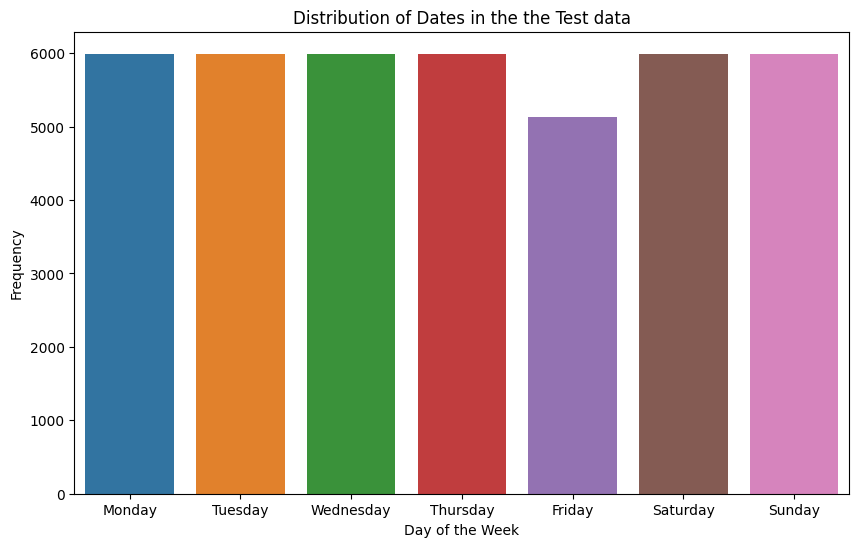

In [ ]:
# Create a new column for the day of the week
# The day_of_week will be in the range 0-6, where 0 is Monday and 6 is Sunday.
test['DayOfWeek'] = test['Date'].dt.dayofweek

# Count occurrences of each day of the week
day_counts = test['DayOfWeek'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=day_counts.index, y=day_counts.values)
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.title('Distribution of Dates in the the Test data')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()


they are even, we will predict almost the same number of values for every day of the week except for fridays that are a bit less, however it wont affect sicnificantly our prediction.

# Merging the data (train with store)

---



In [ ]:
# doing a inner joning to merge the train and store tables with the id train
merged_data = pd.merge(train, store, on = 'Store', how = 'inner')
merged_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [ ]:
# getting info of the merged table
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [ ]:
# displaying the number of rows (which should be the same than the test table) and the resulting number of columns
print(f'Records/rows = {merged_data.shape[0]} \nVariables/coumns = {merged_data.shape[1]}')

Records/rows = 1017209 
Variables/coumns = 18


In [ ]:
# getting a statistical description of the numerical variables of the merged table
merged_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [ ]:
#  convert the date column to a date time type
merged_data['Date'] = pd.to_datetime(merged_data['Date'], format= '%Y-%m-%d')

In [ ]:
# corroborating it was done as expected
merged_data['Date']

0         2015-07-31
1         2015-07-30
2         2015-07-29
3         2015-07-28
4         2015-07-27
             ...    
1017204   2013-01-05
1017205   2013-01-04
1017206   2013-01-03
1017207   2013-01-02
1017208   2013-01-01
Name: Date, Length: 1017209, dtype: datetime64[ns]

In [ ]:
merged_data['Year'] = merged_data['Date'].dt.year
merged_data['Month'] = merged_data['Date'].dt.month
merged_data['DayOfMonth']= merged_data['Date'].dt.day

In [ ]:
# how many sales and customers where recorded when the shops where closed?
merged_data.groupby('Open')[['Sales', 'Customers']].sum()

,Sales,Customers
Open,,
0,0,0
1,5873180623,644041755


In [ ]:
# the mean of sales changes significantly when we remove the days where the shops where closed
print(merged_data['Sales'][merged_data['Open'] == 1].mean())
print(merged_data['Sales'].mean())

6955.514290755952
5773.818972305593


We can remove the sales where the shops were closed since it reduces the mean,and we want to predict sales and no sales are recorded on days where the stores are closed.

In [ ]:
# Create a new data frame with only days the shop was open
merged_data_sales = merged_data[merged_data['Open'] == 1]

In [ ]:
# new number of records
merged_data_sales.shape[0]

844392

In [ ]:
merged_data_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017207
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844392 non-null  int64         
 1   DayOfWeek                  844392 non-null  int64         
 2   Date                       844392 non-null  datetime64[ns]
 3   Sales                      844392 non-null  int64         
 4   Customers                  844392 non-null  int64         
 5   Open                       844392 non-null  int64         
 6   Promo                      844392 non-null  int64         
 7   StateHoliday               844392 non-null  object        
 8   SchoolHoliday              844392 non-null  int64         
 9   StoreType                  844392 non-null  object        
 10  Assortment                 844392 non-null  object        
 11  CompetitionDistance        842206 non-null  float64

In [ ]:
merged_data_sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,DayOfMonth
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,30
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,29
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,28
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,27


In [ ]:
# checking the category of each non numerican variable
variables = ['Open',
             'DayOfWeek',
             'Promo',
             'Promo2',
             'StateHoliday',
             'SchoolHoliday',
             'StoreType',
             'Assortment',
             'CompetitionOpenSinceMonth',
             'CompetitionOpenSinceYear',
             'Promo2SinceWeek',
             'Promo2SinceYear',
             'PromoInterval']

for variable in variables:
    print(variable)
    unique_values = pd.Series(merged_data_sales[variable].unique()).sort_values()
    print(unique_values.tolist())


Open
[1]
DayOfWeek
[1, 2, 3, 4, 5, 6, 7]
Promo
[0, 1]
Promo2
[0, 1]
StateHoliday
['0', 'a', 'b', 'c']
SchoolHoliday
[0, 1]
StoreType
['a', 'b', 'c', 'd']
Assortment
['a', 'b', 'c']
CompetitionOpenSinceMonth
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, nan]
CompetitionOpenSinceYear
[1900.0, 1961.0, 1990.0, 1994.0, 1995.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, nan]
Promo2SinceWeek
[1.0, 5.0, 6.0, 9.0, 10.0, 13.0, 14.0, 18.0, 22.0, 23.0, 26.0, 27.0, 28.0, 31.0, 35.0, 36.0, 37.0, 39.0, 40.0, 44.0, 45.0, 48.0, 49.0, 50.0, nan]
Promo2SinceYear
[2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, nan]
PromoInterval
['Feb,May,Aug,Nov', 'Jan,Apr,Jul,Oct', 'Mar,Jun,Sept,Dec', nan]


here we realised that CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear and PromoInterval have nan so we will deal with them later

# Plot of the variables

array([[<Axes: title={'center': 'Sales'}>]], dtype=object)

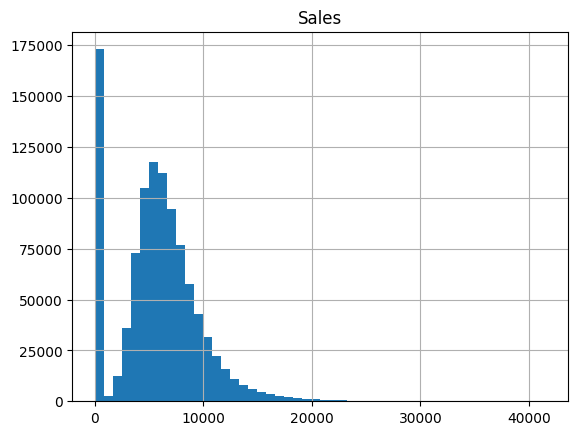

In [ ]:
# histogram of sales
merged_data.hist('Sales', bins=50)

In [ ]:
# how many rows are dupplicated
merged_data.duplicated().sum()

0

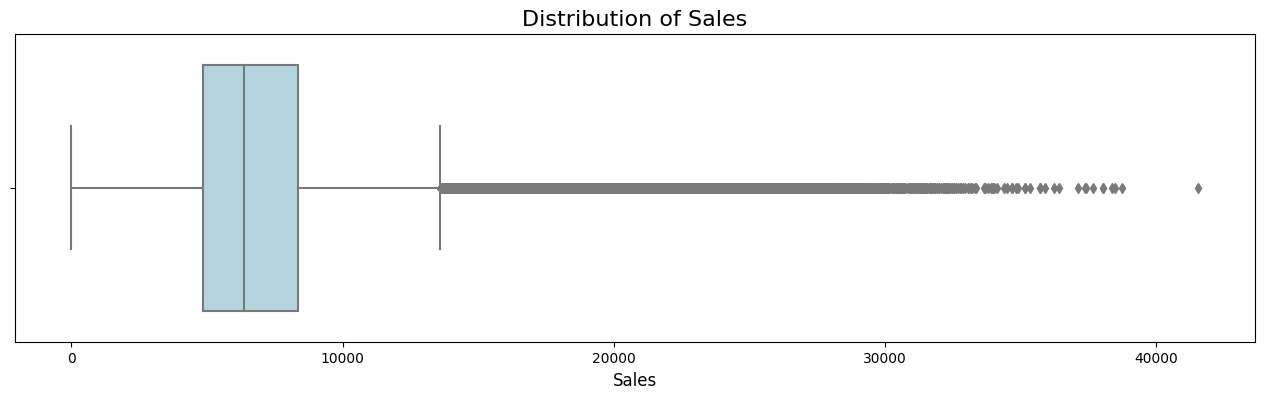

In [ ]:
# Create a larger figure for better visibility
plt.figure(figsize=(16, 4))

# Create a boxplot
boxplot = sns.boxplot(x=merged_data_sales['Sales'], color="lightblue")

# Set a title
plt.title('Distribution of Sales', fontsize=16)
plt.xlabel('Sales', fontsize=12)

plt.show()

In [ ]:
# Calculate Q1 and Q3
Q1 = merged_data_sales['Sales'].quantile(0.25)
Q3 = merged_data_sales['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define the criteria for outliers
outlier_criteria = ((merged_data_sales['Sales'] < (Q1 - 1.5 * IQR)) | (merged_data_sales['Sales'] > (Q3 + 1.5 * IQR)))

# Count the number of outliers
num_outliers = outlier_criteria.sum()
print(f"Number of outliers in Sales: {num_outliers}\nPercentage of the total is {round(num_outliers/(merged_data_sales.shape[0])*100,3)}%")


Number of outliers in Sales: 30769
Percentage of the total is 3.644%


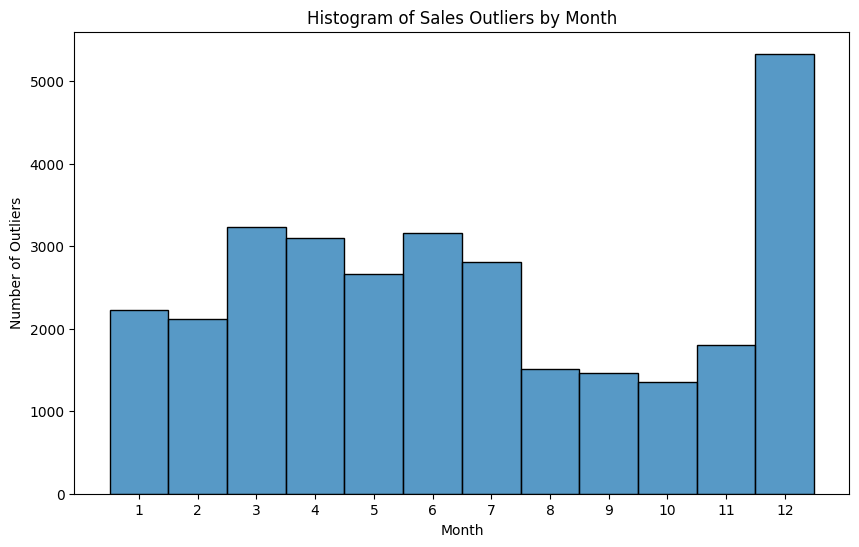

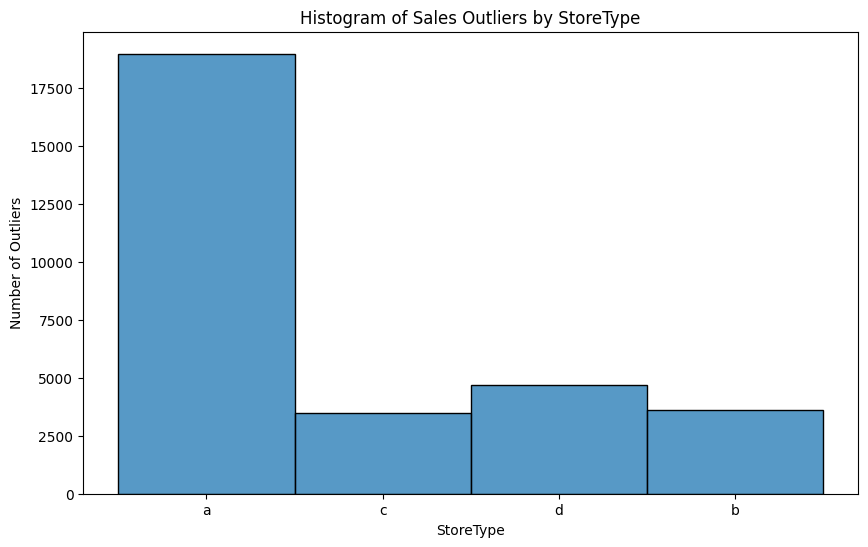

In [ ]:
# Create a DataFrame for outliers
outliers = merged_data_sales[outlier_criteria]

# Histogram by Month
plt.figure(figsize=(10, 6))

# Define bin edges for the 12 months
bins = [i for i in range(1, 14)]  # 13 because the right edge of the last bin is 13

sns.histplot(outliers, x='Month', bins=bins, kde=False)

# Set x-axis to show each month, positioned at the center of each bin
plt.xticks(ticks=[i + 0.5 for i in range(1, 13)], labels=[str(i) for i in range(1, 13)])

plt.title('Histogram of Sales Outliers by Month')
plt.xlabel('Month')
plt.ylabel('Number of Outliers')
plt.show()

# Histogram by StoreType
plt.figure(figsize=(10, 6))
sns.histplot(outliers, x='StoreType', kde=False)
plt.title('Histogram of Sales Outliers by StoreType')
plt.xlabel('StoreType')
plt.ylabel('Number of Outliers')
plt.show()


since the period we are going to predict doesnt involve december, and most of our outliers are in december (which makes sense for christmas time), we are going to input those outliers and assign them the interquantile range so those outliers don't affect or biased much our predictions and we don't remove those records.

In [ ]:
# creating a copy of the data
merged_data_sales_cleaned = merged_data_sales.copy()

In [ ]:
# defining the outlier_threshold
outlier_threshold = Q3 + 1.5 * IQR

In [ ]:
# Replace outliers with the outlier threshold value
merged_data_sales_cleaned['Sales'] = merged_data_sales_cleaned['Sales'].apply(lambda x: outlier_threshold if x > outlier_threshold else x)

In [ ]:
# Calculate the count of missing values per column
missing_values_count = merged_data_sales_cleaned.isna().sum()

# Calculate the total number of records
total_rows = len(merged_data_sales_cleaned)

# Calculate the percentage of missing values per column
missing_values_percentage = (missing_values_count / total_rows) * 100

# Create a DataFrame with the count and percentage of missing values
missing_data_df = pd.DataFrame({
    'Missing Values': missing_values_count,
    'Percentage (%)': missing_values_percentage.round(2)
})

# Display the DataFrame
missing_data_df


,Missing Values,Percentage (%)
Store,0,0.00
DayOfWeek,0,0.00
Date,0,0.00
Sales,0,0.00
Customers,0,0.00
Open,0,0.00
Promo,0,0.00
StateHoliday,0,0.00
SchoolHoliday,0,0.00
StoreType,0,0.00


In [ ]:
#replace the NA values for 'NA' strings
merged_data_sales_cleaned['PromoInterval'] = merged_data_sales_cleaned['PromoInterval'].fillna('Na')

In [ ]:
# for Competition distans we will replace those values with the mean competition fistance of the type of shop
mean_competition_distance = merged_data_sales_cleaned.groupby('StoreType')['CompetitionDistance'].mean()
mean_competition_distance

StoreType
a    5227.668362
b    1072.529075
c    3514.095753
d    6984.782455
Name: CompetitionDistance, dtype: float64

In [ ]:
# Replace missing values in CompetitionDistance for StoreType 'a' with the mean distance
merged_data_sales_cleaned.loc[(merged_data_sales_cleaned['StoreType'] == 'a') &
                              merged_data_sales_cleaned['CompetitionDistance'].isna(),
                              'CompetitionDistance'] = mean_competition_distance['a']

merged_data_sales_cleaned.loc[(merged_data_sales_cleaned['StoreType'] == 'b') &
                              merged_data_sales_cleaned['CompetitionDistance'].isna(),
                              'CompetitionDistance'] = mean_competition_distance['b']

merged_data_sales_cleaned.loc[(merged_data_sales_cleaned['StoreType'] == 'c') &
                              merged_data_sales_cleaned['CompetitionDistance'].isna(),
                              'CompetitionDistance'] = mean_competition_distance['c']

merged_data_sales_cleaned.loc[(merged_data_sales_cleaned['StoreType'] == 'd') &
                              merged_data_sales_cleaned['CompetitionDistance'].isna(),
                              'CompetitionDistance'] = mean_competition_distance['d']

In [ ]:
# Replace missing values in CompetitionDistance for StoreType 'a' with the mean distance
merged_data_sales_cleaned.loc[merged_data_sales_cleaned['CompetitionOpenSinceYear'].isna(), 'CompetitionOpenSinceYear'] = 2016
merged_data_sales_cleaned.loc[merged_data_sales_cleaned['Promo2SinceYear'].isna(), 'Promo2SinceYear'] = 2016

In [ ]:
# Number of missing values in 'CompetitionOpenSinceMonth'
num_missing = merged_data_sales_cleaned['CompetitionOpenSinceMonth'].isna().sum()

# Generate random numbers from 1 to 12 for each missing value
random_months = np.random.randint(1, 13, size=num_missing)

# Assign these random months to the missing values
merged_data_sales_cleaned.loc[merged_data_sales_cleaned['CompetitionOpenSinceMonth'].isna(), 'CompetitionOpenSinceMonth'] = random_months

# Number of missing values in 'CompetitionOpenSinceMonth'
num_missing = merged_data_sales_cleaned['Promo2SinceWeek'].isna().sum()

# Generate random numbers from 1 to 52 for each week
random_week = np.random.randint(1, 53, size=num_missing)

# Assign these random numbers to the missing values
merged_data_sales_cleaned.loc[merged_data_sales_cleaned['Promo2SinceWeek'].isna(), 'Promo2SinceWeek'] = random_week


In [ ]:
# Drop the 'Date' column because it was already divided into day, month and year variables
merged_data_sales_cleaned = merged_data_sales_cleaned.drop('Date', axis=1)
# Drop the 'Open' column because it contains only 1's
merged_data_sales_cleaned = merged_data_sales_cleaned.drop('Open', axis=1)
#we change the type of some variables from float to integer
merged_data_sales_cleaned['CompetitionOpenSinceMonth'] = merged_data_sales_cleaned['CompetitionOpenSinceMonth'].astype(int)
merged_data_sales_cleaned['CompetitionOpenSinceYear'] = merged_data_sales_cleaned['CompetitionOpenSinceYear'].astype(int)
merged_data_sales_cleaned['Promo2SinceWeek'] = merged_data_sales_cleaned['Promo2SinceWeek'].convert_dtypes().astype(int)
merged_data_sales_cleaned['Promo2SinceYear'] = merged_data_sales_cleaned['Promo2SinceYear'].convert_dtypes().astype(int)
#and distance to int if it doesnt contain decimals, if it does, leave it as it is
merged_data_sales_cleaned['CompetitionDistance'] = merged_data_sales_cleaned['CompetitionDistance'].convert_dtypes()


In [ ]:
# Calculate the count of missing values per column
missing_values_count = merged_data_sales_cleaned.isna().sum()

# Calculate the total number of rows
total_rows = len(merged_data_sales_cleaned)

# Calculate the percentage of missing values per column
missing_values_percentage = (missing_values_count / total_rows) * 100

# Create a DataFrame with the count and percentage of missing values
missing_data_df = pd.DataFrame({
    'Missing Values': missing_values_count,
    'Percentage (%)': missing_values_percentage.round(2)
})

# Display the DataFrame
missing_data_df

,Missing Values,Percentage (%)
Store,0,0.0
DayOfWeek,0,0.0
Sales,0,0.0
Customers,0,0.0
Promo,0,0.0
StateHoliday,0,0.0
SchoolHoliday,0,0.0
StoreType,0,0.0
Assortment,0,0.0
CompetitionDistance,0,0.0


# Scale the data

In [ ]:
scaled_data = merged_data_sales_cleaned.copy()

In [ ]:
scaled_data.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,DayOfMonth
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.0,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6840.641704,762.728395,0.446352,0.193580,5460.30084,6.995881,2011.020749,0.498684,24.870073,2013.882596,2013.831937,5.845738,15.835683
std,321.731914,1.723689,2717.319581,401.227674,0.497114,0.395103,7799.572977,3.304541,5.994594,0.499999,14.650838,2.425454,0.777260,3.323931,8.683456
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,20.0,1.000000,1900.000000,0.000000,1.000000,2009.000000,2013.000000,1.000000,1.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000,710.0,4.000000,2008.000000,0.000000,13.000000,2012.000000,2013.000000,3.000000,8.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000,2330.0,7.000000,2012.000000,0.000000,24.000000,2016.000000,2014.000000,6.000000,16.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000,6900.0,10.000000,2016.000000,1.000000,38.000000,2016.000000,2014.000000,8.000000,23.000000
max,1115.000000,7.000000,13611.500000,7388.000000,1.000000,1.000000,75860.0,12.000000,2016.000000,1.000000,52.000000,2016.000000,2015.000000,12.000000,31.000000


In [ ]:
scaled_data.head()

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,DayOfMonth
0,1,5,5263.0,555,1,0,1,c,a,1270.0,9,2008,0,3,2016,Na,2015,7,31
1,1,4,5020.0,546,1,0,1,c,a,1270.0,9,2008,0,45,2016,Na,2015,7,30
2,1,3,4782.0,523,1,0,1,c,a,1270.0,9,2008,0,14,2016,Na,2015,7,29
3,1,2,5011.0,560,1,0,1,c,a,1270.0,9,2008,0,5,2016,Na,2015,7,28
4,1,1,6102.0,612,1,0,1,c,a,1270.0,9,2008,0,38,2016,Na,2015,7,27


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # inicia el escalador

# Reshape the 'Sales' column to a 2D array as scaler expects 2D input
sales_reshaped = scaled_data['Sales'].values.reshape(-1, 1)
Customers_reshaped = scaled_data['Customers'].values.reshape(-1, 1)
Distance_reshaped = scaled_data['CompetitionDistance'].values.reshape(-1, 1)

# Fit the scaler to the data and transform them
scaled_sales = scaler.fit_transform(sales_reshaped)
scaled_Customers = scaler.fit_transform(Customers_reshaped)
scaled_Distance = scaler.fit_transform(Distance_reshaped)

# Replace the original columns with the scaled data
scaled_data['Sales'] = scaled_sales
scaled_data['Customers'] = scaled_Customers
scaled_data['CompetitionDistance'] = scaled_Distance

In [ ]:
scaled_data.head()

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,DayOfMonth
0,1,5,0.386658,0.075122,1,0,1,c,a,0.016482,9,2008,0,3,2016,Na,2015,7,31
1,1,4,0.368806,0.073904,1,0,1,c,a,0.016482,9,2008,0,45,2016,Na,2015,7,30
2,1,3,0.351321,0.070790,1,0,1,c,a,0.016482,9,2008,0,14,2016,Na,2015,7,29
3,1,2,0.368145,0.075799,1,0,1,c,a,0.016482,9,2008,0,5,2016,Na,2015,7,28
4,1,1,0.448297,0.082837,1,0,1,c,a,0.016482,9,2008,0,38,2016,Na,2015,7,27


In [ ]:
# One-Hot Encoding for categorical nominal
scaled_data = pd.get_dummies(scaled_data, columns=['DayOfWeek','StateHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                                                   'CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear',
                                                   'PromoInterval','Year',
                                                   'Month','DayOfMonth'])

In [ ]:
#displaying all columns
pd.set_option('display.max_columns', None)
scaled_data.head()

,Store,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,Promo2,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,CompetitionOpenSinceMonth_1,CompetitionOpenSinceMonth_2,CompetitionOpenSinceMonth_3,CompetitionOpenSinceMonth_4,CompetitionOpenSinceMonth_5,CompetitionOpenSinceMonth_6,CompetitionOpenSinceMonth_7,CompetitionOpenSinceMonth_8,CompetitionOpenSinceMonth_9,CompetitionOpenSinceMonth_10,CompetitionOpenSinceMonth_11,CompetitionOpenSinceMonth_12,CompetitionOpenSinceYear_1900,CompetitionOpenSinceYear_1961,CompetitionOpenSinceYear_1990,CompetitionOpenSinceYear_1994,CompetitionOpenSinceYear_1995,CompetitionOpenSinceYear_1998,CompetitionOpenSinceYear_1999,CompetitionOpenSinceYear_2000,CompetitionOpenSinceYear_2001,CompetitionOpenSinceYear_2002,CompetitionOpenSinceYear_2003,CompetitionOpenSinceYear_2004,CompetitionOpenSinceYear_2005,CompetitionOpenSinceYear_2006,CompetitionOpenSinceYear_2007,CompetitionOpenSinceYear_2008,CompetitionOpenSinceYear_2009,CompetitionOpenSinceYear_2010,CompetitionOpenSinceYear_2011,CompetitionOpenSinceYear_2012,CompetitionOpenSinceYear_2013,CompetitionOpenSinceYear_2014,CompetitionOpenSinceYear_2015,CompetitionOpenSinceYear_2016,Promo2SinceWeek_1,Promo2SinceWeek_2,Promo2SinceWeek_3,Promo2SinceWeek_4,Promo2SinceWeek_5,Promo2SinceWeek_6,Promo2SinceWeek_7,Promo2SinceWeek_8,Promo2SinceWeek_9,Promo2SinceWeek_10,Promo2SinceWeek_11,Promo2SinceWeek_12,Promo2SinceWeek_13,Promo2SinceWeek_14,Promo2SinceWeek_15,Promo2SinceWeek_16,Promo2SinceWeek_17,Promo2SinceWeek_18,Promo2SinceWeek_19,Promo2SinceWeek_20,Promo2SinceWeek_21,Promo2SinceWeek_22,Promo2SinceWeek_23,Promo2SinceWeek_24,Promo2SinceWeek_25,Promo2SinceWeek_26,Promo2SinceWeek_27,Promo2SinceWeek_28,Promo2SinceWeek_29,Promo2SinceWeek_30,Promo2SinceWeek_31,Promo2SinceWeek_32,Promo2SinceWeek_33,Promo2SinceWeek_34,Promo2SinceWeek_35,Promo2SinceWeek_36,Promo2SinceWeek_37,Promo2SinceWeek_38,Promo2SinceWeek_39,Promo2SinceWeek_40,Promo2SinceWeek_41,Promo2SinceWeek_42,Promo2SinceWeek_43,Promo2SinceWeek_44,Promo2SinceWeek_45,Promo2SinceWeek_46,Promo2SinceWeek_47,Promo2SinceWeek_48,Promo2SinceWeek_49,Promo2SinceWeek_50,Promo2SinceWeek_51,Promo2SinceWeek_52,Promo2SinceYear_2009,Promo2SinceYear_2010,Promo2SinceYear_2011,Promo2SinceYear_2012,Promo2SinceYear_2013,Promo2SinceYear_2014,Promo2SinceYear_2015,Promo2SinceYear_2016,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",PromoInterval_Na,Year_2013,Year_2014,Year_2015,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,DayOfMonth_1,DayOfMonth_2,DayOfMonth_3,DayOfMonth_4,DayOfMonth_5,DayOfMonth_6,DayOfMonth_7,DayOfMonth_8,DayOfMonth_9,DayOfMonth_10,DayOfMonth_11,DayOfMonth_12,DayOfMonth_13,DayOfMonth_14,DayOfMonth_15,DayOfMonth_16,DayOfMonth_17,DayOfMonth_18,DayOfMonth_19,DayOfMonth_20,DayOfMonth_21,DayOfMonth_22,DayOfMonth_23,DayOfMonth_24,DayOfMonth_25,DayOfMonth_26,DayOfMonth_27,DayOfMonth_28,DayOfMonth_29,DayOfMonth_30,DayOfMonth_31
0,1,0.386658,0.075122,1,1,0.016482,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0.368806,0.073904,1,1,0.016482,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0.351321,0.070790,1,1,0.016482,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,

we also need to do the same to the test table so that the NN understands it when testing


In [ ]:
#making a copy before preprocessing not to delete the test as it is
clean_test = test.copy()

In [ ]:
# chekig the dataframe one more time
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,3,2015-09-17,1.0,1,0,0
1,2,3,3,2015-09-17,1.0,1,0,0
2,3,7,3,2015-09-17,1.0,1,0,0
3,4,8,3,2015-09-17,1.0,1,0,0
4,5,9,3,2015-09-17,1.0,1,0,0


In [ ]:
#creating the year day month variables
clean_test['Year'] = test['Date'].dt.year
clean_test['Month'] = test['Date'].dt.month
clean_test['DayOfMonth']= test['Date'].dt.day
# Drop the 'Date' column because it was already divided into day, month and year variables
clean_test = clean_test.drop('Date', axis=1)


In [ ]:
# scaling the test
clean_test['Open'].unique()

array([1., 0.])

In [ ]:
# change the open to a int value
clean_test['Open'] = clean_test['Open'].astype(int)

In [ ]:
clean_test.head()

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,DayOfMonth
0,1,1,3,1,1,0,0,2015,9,17
1,2,3,3,1,1,0,0,2015,9,17
2,3,7,3,1,1,0,0,2015,9,17
3,4,8,3,1,1,0,0,2015,9,17
4,5,9,3,1,1,0,0,2015,9,17


In [ ]:
# One-Hot Encoding for categorical variables
clean_test = pd.get_dummies(clean_test, columns=['DayOfWeek','StateHoliday','Year', 'Month','DayOfMonth'])

In [ ]:
clean_test.head()

,Id,Store,Open,Promo,SchoolHoliday,DayOfWeek_0,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,StateHoliday_0,StateHoliday_a,Year_2015,Month_8,Month_9,DayOfMonth_1,DayOfMonth_2,DayOfMonth_3,DayOfMonth_4,DayOfMonth_5,DayOfMonth_6,DayOfMonth_7,DayOfMonth_8,DayOfMonth_9,DayOfMonth_10,DayOfMonth_11,DayOfMonth_12,DayOfMonth_13,DayOfMonth_14,DayOfMonth_15,DayOfMonth_16,DayOfMonth_17,DayOfMonth_18,DayOfMonth_19,DayOfMonth_20,DayOfMonth_21,DayOfMonth_22,DayOfMonth_23,DayOfMonth_24,DayOfMonth_25,DayOfMonth_26,DayOfMonth_27,DayOfMonth_28,DayOfMonth_29,DayOfMonth_30,DayOfMonth_31
0,1,1,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,3,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,7,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,8,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,9,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# create a copy for the final dcleaned training data
clean_train = scaled_data.copy()

In [ ]:
clean_test.head(5)

,Id,Store,Open,Promo,SchoolHoliday,DayOfWeek_0,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,StateHoliday_0,StateHoliday_a,Year_2015,Month_8,Month_9,DayOfMonth_1,DayOfMonth_2,DayOfMonth_3,DayOfMonth_4,DayOfMonth_5,DayOfMonth_6,DayOfMonth_7,DayOfMonth_8,DayOfMonth_9,DayOfMonth_10,DayOfMonth_11,DayOfMonth_12,DayOfMonth_13,DayOfMonth_14,DayOfMonth_15,DayOfMonth_16,DayOfMonth_17,DayOfMonth_18,DayOfMonth_19,DayOfMonth_20,DayOfMonth_21,DayOfMonth_22,DayOfMonth_23,DayOfMonth_24,DayOfMonth_25,DayOfMonth_26,DayOfMonth_27,DayOfMonth_28,DayOfMonth_29,DayOfMonth_30,DayOfMonth_31
0,1,1,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,3,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,7,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,8,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,9,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
clean_train.head(5)

,Store,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,Promo2,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,CompetitionOpenSinceMonth_1,CompetitionOpenSinceMonth_2,CompetitionOpenSinceMonth_3,CompetitionOpenSinceMonth_4,CompetitionOpenSinceMonth_5,CompetitionOpenSinceMonth_6,CompetitionOpenSinceMonth_7,CompetitionOpenSinceMonth_8,CompetitionOpenSinceMonth_9,CompetitionOpenSinceMonth_10,CompetitionOpenSinceMonth_11,CompetitionOpenSinceMonth_12,CompetitionOpenSinceYear_1900,CompetitionOpenSinceYear_1961,CompetitionOpenSinceYear_1990,CompetitionOpenSinceYear_1994,CompetitionOpenSinceYear_1995,CompetitionOpenSinceYear_1998,CompetitionOpenSinceYear_1999,CompetitionOpenSinceYear_2000,CompetitionOpenSinceYear_2001,CompetitionOpenSinceYear_2002,CompetitionOpenSinceYear_2003,CompetitionOpenSinceYear_2004,CompetitionOpenSinceYear_2005,CompetitionOpenSinceYear_2006,CompetitionOpenSinceYear_2007,CompetitionOpenSinceYear_2008,CompetitionOpenSinceYear_2009,CompetitionOpenSinceYear_2010,CompetitionOpenSinceYear_2011,CompetitionOpenSinceYear_2012,CompetitionOpenSinceYear_2013,CompetitionOpenSinceYear_2014,CompetitionOpenSinceYear_2015,CompetitionOpenSinceYear_2016,Promo2SinceWeek_1,Promo2SinceWeek_2,Promo2SinceWeek_3,Promo2SinceWeek_4,Promo2SinceWeek_5,Promo2SinceWeek_6,Promo2SinceWeek_7,Promo2SinceWeek_8,Promo2SinceWeek_9,Promo2SinceWeek_10,Promo2SinceWeek_11,Promo2SinceWeek_12,Promo2SinceWeek_13,Promo2SinceWeek_14,Promo2SinceWeek_15,Promo2SinceWeek_16,Promo2SinceWeek_17,Promo2SinceWeek_18,Promo2SinceWeek_19,Promo2SinceWeek_20,Promo2SinceWeek_21,Promo2SinceWeek_22,Promo2SinceWeek_23,Promo2SinceWeek_24,Promo2SinceWeek_25,Promo2SinceWeek_26,Promo2SinceWeek_27,Promo2SinceWeek_28,Promo2SinceWeek_29,Promo2SinceWeek_30,Promo2SinceWeek_31,Promo2SinceWeek_32,Promo2SinceWeek_33,Promo2SinceWeek_34,Promo2SinceWeek_35,Promo2SinceWeek_36,Promo2SinceWeek_37,Promo2SinceWeek_38,Promo2SinceWeek_39,Promo2SinceWeek_40,Promo2SinceWeek_41,Promo2SinceWeek_42,Promo2SinceWeek_43,Promo2SinceWeek_44,Promo2SinceWeek_45,Promo2SinceWeek_46,Promo2SinceWeek_47,Promo2SinceWeek_48,Promo2SinceWeek_49,Promo2SinceWeek_50,Promo2SinceWeek_51,Promo2SinceWeek_52,Promo2SinceYear_2009,Promo2SinceYear_2010,Promo2SinceYear_2011,Promo2SinceYear_2012,Promo2SinceYear_2013,Promo2SinceYear_2014,Promo2SinceYear_2015,Promo2SinceYear_2016,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",PromoInterval_Na,Year_2013,Year_2014,Year_2015,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,DayOfMonth_1,DayOfMonth_2,DayOfMonth_3,DayOfMonth_4,DayOfMonth_5,DayOfMonth_6,DayOfMonth_7,DayOfMonth_8,DayOfMonth_9,DayOfMonth_10,DayOfMonth_11,DayOfMonth_12,DayOfMonth_13,DayOfMonth_14,DayOfMonth_15,DayOfMonth_16,DayOfMonth_17,DayOfMonth_18,DayOfMonth_19,DayOfMonth_20,DayOfMonth_21,DayOfMonth_22,DayOfMonth_23,DayOfMonth_24,DayOfMonth_25,DayOfMonth_26,DayOfMonth_27,DayOfMonth_28,DayOfMonth_29,DayOfMonth_30,DayOfMonth_31
0,1,0.386658,0.075122,1,1,0.016482,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0.368806,0.073904,1,1,0.016482,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0.351321,0.070790,1,1,0.016482,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = clean_train.drop('Sales', axis=1)  # Features (predictors)
Y = clean_train['Sales']  # Target variable
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.3, random_state=96)

X_train = X_train.to_numpy()
X_val = X_val.to_numpy()
Y_train = Y_train.to_numpy()
Y_val = Y_val.to_numpy()
Y_train.shape


(591074,)

In [ ]:
X_train = X_train.reshape(-1, X_train.shape[1], 1)
X_val = X_val.reshape(-1, X_val.shape[1], 1)



In [ ]:
import tensorflow as tf

cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv1D(32, 2, activation='relu', input_shape= X_train.shape[1:]))
cnn.add(tf.keras.layers.MaxPooling1D(2))
cnn.add(tf.keras.layers.Conv1D(64, 2, activation='relu'))
cnn.add(tf.keras.layers.MaxPooling1D(2))
cnn.add(tf.keras.layers.Dropout(0.3))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(50, activation='sigmoid'))
cnn.add(tf.keras.layers.Dense(1))

# compile model
cnn.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

cnn.fit(X_train, Y_train, epochs=20, validation_data=(X_val, Y_val))



Epoch 1/20
18472/18472 [==============================] - 107s 5ms/step - loss: 0.0226 - root_mean_squared_error: 0.1502 - val_loss: 0.0170 - val_root_mean_squared_error: 0.1305
Epoch 2/20
18472/18472 [==============================] - 92s 5ms/step - loss: 0.0160 - root_mean_squared_error: 0.1263 - val_loss: 0.0134 - val_root_mean_squared_error: 0.1160
Epoch 3/20
18472/18472 [==============================] - 97s 5ms/step - loss: 0.0147 - root_mean_squared_error: 0.1211 - val_loss: 0.0127 - val_root_mean_squared_error: 0.1129
Epoch 4/20
18472/18472 [==============================] - 91s 5ms/step - loss: 0.0140 - root_mean_squared_error: 0.1185 - val_loss: 0.0123 - val_root_mean_squared_error: 0.1107
Epoch 5/20
18472/18472 [==============================] - 101s 5ms/step - loss: 0.0136 - root_mean_squared_error: 0.1166 - val_loss: 0.0120 - val_root_mean_squared_error: 0.1096
Epoch 6/20
18472/18472 [==============================] - 101s 5ms/step - loss: 0.0133 - root_mean_squared_error:

In [ ]:

import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense

lstm = tf.keras.models.Sequential()
lstm.add(LSTM(units=50, return_sequences=True, input_shape=X_train.shape[1:]))
lstm.add(LSTM(units=50))
lstm.add(Dense(1))
lstm.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

lstm.fit(X_train, Y_train, epochs=20, validation_data=(X_val, Y_val))
